# **Importing Libraries**

In [294]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score

In [235]:
np.random.seed(0)


In [236]:
df=pd.read_csv('train.csv')

In [237]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#EDA

# **Gender**

In [238]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [239]:
fig = px.histogram(df, x="Gender", color="Gender", title="Gender Count Plot", labels={"Gender": "Gender"})
fig.update_layout(barmode='stack')
fig.show()

The number of male applicants is higher compared to female applicants.

# **Married**

In [240]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [241]:
fig = px.histogram(df, x="Married", color="Married", title="Marital Status Count Plot", labels={"Married": "Marital Status"})
fig.update_layout(barmode='stack')
fig.show()

The number of applicants that has been married is higher compared to applicants that hasn't married.

# **Education**

In [242]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [243]:
fig = px.histogram(df, x="Education", color="Education", title="Education Level Count Plot", labels={"Education": "Education Level"})
fig.update_layout(barmode='stack')
fig.show()

The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

# **Self_Employed**

In [244]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [245]:
fig = px.histogram(df, x="Self_Employed", color="Self_Employed", title="Self-Employment Status Count Plot", labels={"Self_Employed": "Self-Employment Status"})
fig.update_layout(barmode='stack')
fig.show()

The number of applicants that are not self employed is higher compared to applicants that are self employed.

# **Credit_History**

In [246]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [247]:
fig = px.histogram(df, x="Credit_History", color="Credit_History", title="Credit History Count Plot", labels={"Credit_History": "Credit History"})
fig.update_layout(barmode='stack')
fig.show()

 The number of applicants that have good credit history is higher compared to applicants that have bad credit history.

# **Property_Area**

In [248]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [249]:
fig = px.histogram(df, x="Property_Area", color="Property_Area", title="Property Area Count Plot", labels={"Property_Area": "Property Area"})
fig.update_layout(barmode='stack')
fig.show()

This column has a balanced distribution between Urban, Rural, and Semiurban property area.

# **Loan_Status**

In [250]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [251]:
fig = px.histogram(df, x="Loan_Status", color="Loan_Status", title="Loan Status Count Plot", labels={"Loan_Status": "Loan Status"})
fig.update_layout(barmode='stack')
fig.show()

The number of approved loans is higher compared to rejected loans .

# **Loan_Amount_Term**

In [252]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [253]:
fig = px.histogram(df, x="Loan_Amount_Term", color="Loan_Amount_Term", title="Loan Amount Term Count Plot", labels={"Loan_Amount_Term": "Loan Amount Term"})
fig.update_layout(barmode='stack')
fig.show()

the 360 months loan duration is the most popular compared to others.

**Analysis of Numeric Columns**

In [254]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [255]:
fig = px.histogram(df, x="ApplicantIncome", nbins=50, title="Applicant Income",
                   labels={"ApplicantIncome": "Applicant Income"}, color_discrete_sequence=['green'])

fig.update_layout(showlegend=False)
fig.show()

fig = px.histogram(df, x="CoapplicantIncome", nbins=50, title="Coapplicant Income",
                   labels={"CoapplicantIncome": "Coapplicant Income"}, color_discrete_sequence=['skyblue'])

fig.update_layout(showlegend=False)
fig.show()

fig = px.histogram(df, x="LoanAmount", nbins=50, title="Loan Amount",
                   labels={"LoanAmount": "Loan Amount"}, color_discrete_sequence=['orange'])

fig.update_layout(showlegend=False)
fig.show()

Bivariate analysis

**Gender vs Married**

In [256]:
fig = px.bar(df, x="Gender", color="Married", title="Gender vs Married",
             labels={"Gender": "Gender", "Married": "Married"},
             category_orders={"Gender": df["Gender"].unique()})

fig.update_layout(barmode='stack', xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=df["Gender"].unique()))
fig.show()

By this we can conclude that most applicants are male with gender married

**Gender vs Loan status**

In [257]:
fig = px.bar(df, x="Gender", color="Loan_Status", title="Gender vs Loan_Status",
             labels={"Gender": "Gender", "Loan_Status": "Loan_Status"},
             category_orders={"Gender": df["Gender"].unique()})

fig.update_layout(barmode='stack', xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=df["Gender"].unique()))
fig.show()

**property area vs loan status**

In [258]:
fig = px.bar(df, x="Property_Area", color="Loan_Status", title='Property Area vs Loan Status',
             labels={"Property_Area": "Property Area", "Loan_Status": "Loan Status"},
             category_orders={"Property_Area": df["Property_Area"].unique()})

fig.update_layout(barmode='stack', xaxis=dict(tickmode='array', tickvals=[0, 1, 2], ticktext=df["Property_Area"].unique()))
fig.show()

Most of the applications are accepted not regarding area

**Education vs Loan Status**

In [259]:
fig = px.bar(df, x="Education", color="Loan_Status", title="Education vs Loan_Status",
             labels={"Education": "Education", "Loan_Status": "Loan_Status"},
             category_orders={"Education": df["Education"].unique()})

fig.update_layout(barmode='stack', xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=df["Education"].unique()))
fig.show()

**Loan Status vs Applicants income**

In [260]:
fig = px.box(df, x="Loan_Status", y="ApplicantIncome", title='Loan Status vs Applicant Income',
             labels={"Loan_Status": "Loan Status", "ApplicantIncome": "Applicant Income"},
             color="Loan_Status", color_discrete_sequence=['#ff6b6b', '#66b3ff'])

fig.show()

Applicants income is positively skewed


**CoapplicantsIncome vs Loan_status**

In [261]:
fig = px.box(df, x="Loan_Status", y="CoapplicantIncome", title='Coapplicant Income vs Loan Status',
             labels={"Loan_Status": "Loan Status", "CoapplicantIncome": "Coapplicant Income"},
             color="Loan_Status")

fig.show()

Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

**Loan Status vs Loan amount**

In [262]:
fig = px.box(df, x="Loan_Status", y="LoanAmount", title='Loan Status vs Loan Amount',
             labels={"Loan_Status": "Loan Status", "LoanAmount": "Loan Amount"},
             color="Loan_Status")

fig.show()

Loan Amount has a high number of outliers, and the distribution is also positively skewed.

**Scatter plot for applicants income and coapplicants income**

In [263]:
fig = px.scatter(df, x='ApplicantIncome', y='CoapplicantIncome', title='Applicant Income - Coapplicant Income',
                 labels={"ApplicantIncome": "Applicant Income", "CoapplicantIncome": "Coapplicant Income"})

fig.show()



In [264]:
correlation_coefficient = df['ApplicantIncome'].corr(df['CoapplicantIncome'])
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: -0.11660458122889966


 "Applicant Income" and "Coapplicant Income" suggests a very weak negative correlation

**HeatMap to show Correlation**

In [265]:
corr_matrix = df.corr(numeric_only=True)

fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                   x=list(corr_matrix.columns),
                                   y=list(corr_matrix.index),
                                   colorscale='inferno')

fig.update_layout(title_text="Correlation Heatmap", title_x=0.5)
fig.show()

Loan amount and applicants income has positive correlation

Applicants income vs CoapplicantIncome vs Loan Amount

In [266]:
fig = px.scatter_matrix(df, dimensions=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], color="Loan_Status", title="Scatter Matrix of Numerical Variables")
fig.show()

# **Preprocessing**

Removing unnessary columns from the dataset
we remove columns based on Higher cardinality(column having high number of unique values)

EX: all ID's,zipcodes etc

In [267]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [268]:
encoder = {'0': 1/4, '1': 2/4, '2': 3/4, '3+': 4/4}
df["Dependents"] = df['Dependents'].map(encoder)

#Data Imputation

In [269]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [270]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [271]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [272]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Creating new features

In [273]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanAmount_Income_Ratio'] = df['LoanAmount'] / df['TotalIncome']

In [274]:
df['LoanTermInYears'] = df['Loan_Amount_Term'] / 12


In [275]:
df.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],axis=1,inplace=True)

#One-hot Encoding for categorical columns

We use encoding only for categorical columns

Categorical columns are two types

1.Nominal(the data which dont have an order Ex:names,gender,colours[They dont follow order])

2.Ordinal(the data which has an order Ex:Movie ratings, Education Levels)

In [276]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

df.head()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Income_Ratio,LoanTermInYears
0,1,0,0.25,0,0,128.0,1.0,2,Y,5849.0,0.021884,30.0
1,1,1,0.50,0,0,128.0,1.0,0,N,6091.0,0.021015,30.0
2,1,1,0.25,0,1,66.0,1.0,2,Y,3000.0,0.022000,30.0
3,1,1,0.25,1,0,120.0,1.0,2,Y,4941.0,0.024287,30.0
4,1,0,0.25,0,0,141.0,1.0,2,Y,6000.0,0.023500,30.0


Encoding target Column

In [277]:
df['Loan_Status']=label_encoder.fit_transform(df['Loan_Status'])


In [278]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Income_Ratio,LoanTermInYears
0,1,0,0.25,0,0,128.0,1.0,2,1,5849.0,0.021884,30.0
1,1,1,0.50,0,0,128.0,1.0,0,0,6091.0,0.021015,30.0
2,1,1,0.25,0,1,66.0,1.0,2,1,3000.0,0.022000,30.0
3,1,1,0.25,1,0,120.0,1.0,2,1,4941.0,0.024287,30.0
4,1,0,0.25,0,0,141.0,1.0,2,1,6000.0,0.023500,30.0


Removing outliers

In [279]:
Q1 = df[['LoanAmount', 'TotalIncome', 'LoanAmount_Income_Ratio']].quantile(0.25)
Q3 = df[['LoanAmount', 'TotalIncome', 'LoanAmount_Income_Ratio']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['LoanAmount', 'TotalIncome', 'LoanAmount_Income_Ratio']] < (Q1 - 1.5 * IQR)) | (df[['LoanAmount', 'TotalIncome', 'LoanAmount_Income_Ratio']] > (Q3 + 1.5 * IQR))).any(axis=1)]


Standardization

In [280]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['LoanAmount', 'TotalIncome', 'LoanAmount_Income_Ratio']
scaler = StandardScaler()
df[[col + '_scaled' for col in columns_to_scale]] = scaler.fit_transform(df[columns_to_scale])



In [281]:
df.drop(['LoanAmount', 'TotalIncome', 'LoanAmount_Income_Ratio'],axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

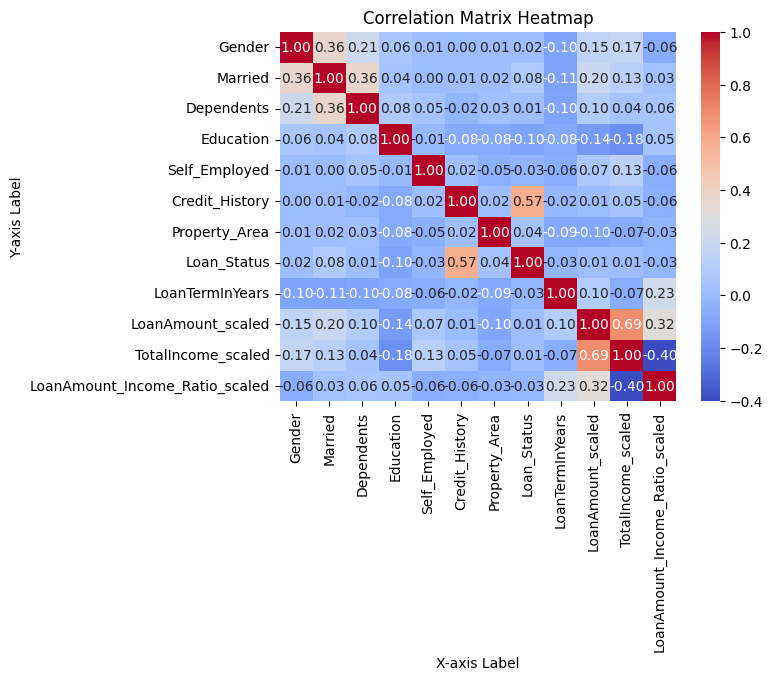

In [282]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add labels and title
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Correlation Matrix Heatmap")

Credit history is having 0.57 postive correlation with Loan status

# splitting the data

In [283]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

To handle class imbalance

In [284]:
X, y = SMOTE().fit_resample(X, y)

In [285]:
y.value_counts()

1    376
0    376
Name: Loan_Status, dtype: int64

In [286]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [287]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanTermInYears,LoanAmount_scaled,TotalIncome_scaled,LoanAmount_Income_Ratio_scaled
495,1,1,0.250000,0,0,0.000000,2,30.000000,0.847701,0.466966,0.216804
251,0,0,0.250000,0,0,1.000000,1,30.000000,-0.273686,-0.681733,0.660870
97,1,0,0.250000,1,0,1.000000,0,30.000000,-0.161547,0.827140,-1.192863
520,1,1,0.250000,1,0,1.000000,0,30.000000,0.623423,0.052720,0.560210
473,1,0,0.250000,1,0,1.000000,1,3.000000,-1.058656,-1.041906,0.007327
...,...,...,...,...,...,...,...,...,...,...,...
707,1,1,1.000000,0,0,0.000000,1,25.276872,1.156794,0.706724,0.245447
192,1,1,0.750000,0,0,0.000000,1,30.000000,-1.238078,-0.269837,-1.508928
629,1,1,0.429215,1,0,0.000000,0,15.000000,0.011669,-0.414479,0.553305
559,1,0,0.448424,0,0,0.000000,2,15.000000,-0.293993,-0.207511,-0.251486


#Model Building

**Logistic regression**

In [288]:
from sklearn.linear_model import LogisticRegression

LogRegClassifier = LogisticRegression(max_iter=500)
LogRegClassifier.fit(X_train, y_train)

y_train_pred_logreg = LogRegClassifier.predict(X_train)
y_test_pred_logreg = LogRegClassifier.predict(X_test)


train_accuracy_logreg = accuracy_score(y_train_pred_logreg, y_train)
train_f1_score_logreg = f1_score(y_train, y_train_pred_logreg, average='weighted')
test_accuracy_logreg = accuracy_score(y_test_pred_logreg, y_test)
test_f1_score_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')


print('Training Accuracy (Logistic Regression): {:.2f}%'.format(train_accuracy_logreg * 100))
print('Testing Accuracy (Logistic Regression): {:.2f}%'.format(test_accuracy_logreg * 100))
print('Training F1 Score (Logistic Regression): {:.2f}'.format(train_f1_score_logreg*100))
print('Testing F1 Score (Logistic Regression): {:.2f}'.format(test_f1_score_logreg*100))


print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred_logreg))




Training Accuracy (Logistic Regression): 76.21%
Testing Accuracy (Logistic Regression): 76.16%
Training F1 Score (Logistic Regression): 75.14
Testing F1 Score (Logistic Regression): 75.01

Confusion Matrix (Testing Set):
[[42 35]
 [ 1 73]]


Using KNN

In [298]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
tr_pred = knn_model.predict(X_test)
trg_pred=knn_model.predict(X_train)

print(confusion_matrix(y_test,tr_pred))
print('training accuracy',accuracy_score(y_train,trg_pred))
print('testing accuracy',accuracy_score(y_test,tr_pred))
print('training precion',precision_score(y_train,trg_pred))
print('training precion',precision_score(y_test,tr_pred))

[[63 14]
 [16 58]]
training accuracy 0.8968386023294509
testing accuracy 0.8013245033112583
training precion 0.9166666666666666
training precion 0.8055555555555556


DecisionTreeClassifier

In [297]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

train_pred=dt_model.predict(X_train)
y_pred = dt_model.predict(X_test)


print(confusion_matrix(y_test,y_pred))
print('training accuracy',accuracy_score(y_train,train_pred))
print('testing accuracy',accuracy_score(y_test,y_pred))
print('training precion',precision_score(y_train,train_pred))
print('training precion',precision_score(y_test,y_pred))

[[63 14]
 [16 58]]
training accuracy 1.0
testing accuracy 0.8013245033112583
training precion 1.0
training precion 0.8055555555555556


Using RandomForest


In [295]:
RFclassifier = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=21)
RFclassifier.fit(X_train, y_train)

y_test_pred_rf = RFclassifier.predict(X_test)
y_train_pred_rf=RFclassifier.predict(X_train)

print(confusion_matrix(y_test,y_test_pred_rf))
print('training accuracy',accuracy_score(y_train,y_train_pred_rf))
print('testing accuracy',accuracy_score(y_test,y_test_pred_rf))
print('training precion',precision_score(y_train,y_train_pred_rf))
print('training precion',precision_score(y_test,y_test_pred_rf))

[[55 22]
 [ 2 72]]
training accuracy 0.870216306156406
testing accuracy 0.8410596026490066
training precion 0.8043478260869565
training precion 0.7659574468085106
